### Contains data about various ski resorts in Europe.
###### Unnamed: 0: An index column.
###### Resort: Name of the ski resort.
###### Country: Country where the resort is located.
###### HighestPoint: The highest point of the resort in meters.
###### LowestPoint: The lowest point of the resort in meters.
###### DayPassPriceAdult: Price of an adult day pass in Euros.
###### BeginnerSlope: Length of beginner slopes in kilometers.
###### IntermediateSlope: Length of intermediate slopes in kilometers.
###### DifficultSlope: Length of difficult slopes in kilometers.
###### TotalSlope: Total length of slopes in kilometers.
###### Snowparks: Availability of snowparks (Yes/No).
###### NightSki: Availability of night skiing (Yes/No).
###### SurfaceLifts: Number of surface lifts.
###### ChairLifts: Number of chairlifts.
###### GondolaLifts: Number of gondola lifts.
###### TotalLifts: Total number of lifts.
###### LiftCapacity: Lift capacity per hour.
###### SnowCannons: Number of snow cannons.

In [225]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Load the CSV file
file_path = '/Users/madisonavemoe/Desktop/European_Ski_Resorts.csv'
ski_resorts_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
ski_resorts_data.head()


Unnamed: 0                                             Resort  \
0           1                              Alpendorf (Ski amedé)   
1           2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2           3                              Oberau (Wildschönau)   
3           4                                     Dachstein West   
4           5                                        Rosa Khutor   

           Country  HighestPoint  LowestPoint  DayPassPriceAdult  \
0          Austria          1980          740                 52   
1          Andorra          2640         1710                 47   
2          Austria          1130          900                 30   
3          Austria          1620          780                 42   
4  Southern Russia          2320          940                 22   

   BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope Snowparks  \
0             30                 81               4         115       Yes   
1            100                 77              33         210       Yes   
2              1                  0               1           2        No   
3             15                 33               3          51       Yes   
4             30                 26              21          77       Yes   

  NightSki  SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
0       No            22          16            11          49         75398   
1      Yes            37          28             7          72         99017   
2       No             2           0             0           2          1932   
3      Yes            25           8             3          36         32938   
4       No             6          11            10          27         49228   

   SnowCannons  
0          600  
1         1032  
2            0  
3          163  
4          450

In [150]:
# checking Dtypes and nulls.
ski_resorts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         376 non-null    int64 
 1   Resort             376 non-null    object
 2   Country            376 non-null    object
 3   HighestPoint       376 non-null    int64 
 4   LowestPoint        376 non-null    int64 
 5   DayPassPriceAdult  376 non-null    int64 
 6   BeginnerSlope      376 non-null    int64 
 7   IntermediateSlope  376 non-null    int64 
 8   DifficultSlope     376 non-null    int64 
 9   TotalSlope         376 non-null    int64 
 10  Snowparks          376 non-null    object
 11  NightSki           376 non-null    object
 12  SurfaceLifts       376 non-null    int64 
 13  ChairLifts         376 non-null    int64 
 14  GondolaLifts       376 non-null    int64 
 15  TotalLifts         376 non-null    int64 
 16  LiftCapacity       376 non-null    int64 
 1

# Numerical Data

In [151]:

# Basic statistics for numerical columns
ski_resorts_data.describe()


Unnamed: 0  HighestPoint  LowestPoint  DayPassPriceAdult  \
count  376.000000    376.000000   376.000000         376.000000   
mean   188.500000   2051.688830  1055.098404          40.779255   
std    108.686092    776.719908   423.604310          12.474259   
min      1.000000      0.000000     0.000000           0.000000   
25%     94.750000   1550.000000   779.250000          34.000000   
50%    188.500000   2104.000000  1050.000000          42.000000   
75%    282.250000   2567.500000  1350.000000          49.000000   
max    376.000000   3899.000000  2180.000000          81.000000   

       BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope  \
count     376.000000         376.000000      376.000000  376.000000   
mean       35.869681          38.348404       11.776596   86.257979   
std        53.719832          49.691136       17.785780  113.740218   
min         0.000000           0.000000        0.000000    0.000000   
25%         8.000000           9.000000        2.000000   25.000000   
50%        19.000000          22.000000        5.000000   48.000000   
75%        40.000000          42.250000       13.000000  100.000000   
max       312.000000         239.000000      103.000000  600.000000   

       SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts   LiftCapacity  \
count    376.000000  376.000000    376.000000  376.000000     376.000000   
mean      13.662234    9.340426      3.954787   26.957447   34727.244681   
std       14.438661   12.595282      6.565411   31.038957   45955.042689   
min        0.000000    0.000000      0.000000    0.000000       0.000000   
25%        5.000000    2.000000      0.000000   10.000000   10642.500000   
50%        9.000000    5.000000      2.000000   17.000000   19031.500000   
75%       17.000000   10.000000      5.000000   29.250000   36555.500000   
max       89.000000   74.000000     40.000000  174.000000  252280.000000   

       SnowCannons  
count   376.000000  
mean    218.361702  
std     406.903529  
min       0.000000  
25%       0.000000  
50%      54.000000  
75%     252.000000  
max    2383.000000

# Numerical Data Summary
#### 1. HighestPoint: The average highest point of the resorts is about 2052 meters with the max being 3889.
#### 2. Lowest Point: The average lowest point is at 1055 meters.
#### 3. DayPassPrice(Adult): The average day pass price for adults is approximately 40.7 euros with the max being 81.
#### 4. Slope Lengths:  On average, resorts have about 35.87 km of beginner slopes, 38.35 km of intermediate slopes, and 11.78 km of difficult slopes. The total slope length averages around 86.26 km.
#### 5. Lifts: The average number of total lifts in a resort is around 27, with an average lift capacity of 34,727 per hour.
#### 6. Snow Cannon: Resort have an average of 218 snow cannons.

# Categorical Data Analysis

In [16]:
# Count of unique values for categorical columns
country_count = ski_resorts_data['Country'].value_counts()
snowparks_count = ski_resorts_data['Snowparks'].value_counts()
nightski_count = ski_resorts_data['NightSki'].value_counts()

country_count, snowparks_count, nightski_count

(Country
 Austria                   89
 France                    83
 Switzerland               61
 Italy                     44
 Germany                   24
 Norway                    10
 Spain                      8
 Denmark                    8
 Sweden                     6
 Andorra                    5
 Slovakia                   5
 Slovenia                   4
 United Kingdom             4
 Bulgaria                   4
 Southern Russia            4
 Finland                    3
 Poland                     2
 Czech Republic             2
 Romania                    2
 Lithuania                  1
 Liechtenstein              1
 Serbia                     1
 Greece                     1
 Siberia                    1
 Bosnia and Herzegovina     1
 Ukraine                    1
 Netherlands                1
 Name: count, dtype: int64,
 Snowparks
 Yes          278
 No            90
 no report      8
 Name: count, dtype: int64,
 NightSki
 No     224
 Yes    152
 Name: count, dtype: int64

<BarContainer object of 27 artists>

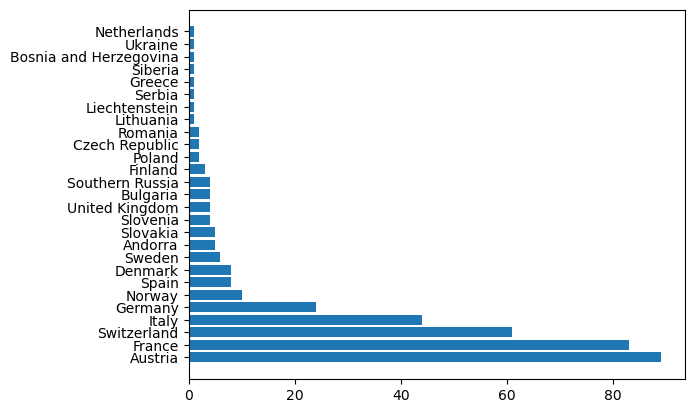

In [19]:
plt.barh(country_count.index,country_count.values)

<BarContainer object of 3 artists>

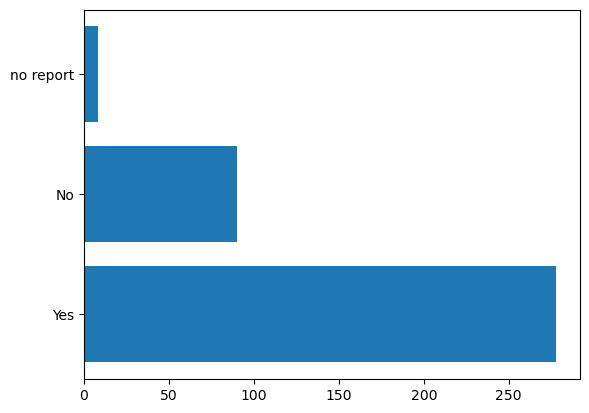

In [20]:
plt.barh(snowparks_count.index,snowparks_count.values)

<BarContainer object of 2 artists>

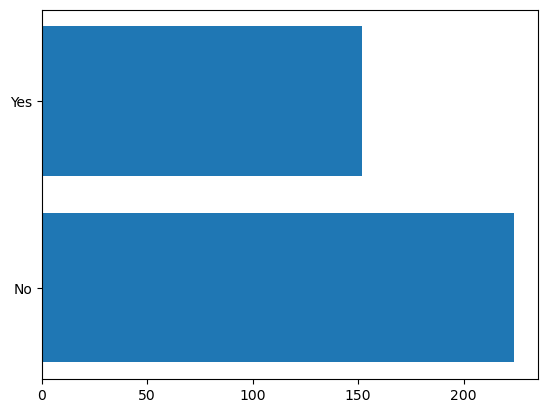

In [21]:
plt.barh(nightski_count.index,nightski_count.values)

# Categorical Data Summary
##### 1. Countries: Austria (89 resorts), France (83), and Switzerland (61) have the highest number of ski resorts in the dataset.
##### 2. Snowparks: 278 resorts have snowparks, while 90 do not.
##### 3. Night Skiing: 152 resorts offer night skiing, whereas 224 do not.

# Distrubutions for Numerical Features.

In [23]:
# Grabbing columns to create histograms.
ski_resorts_data.columns

Index(['Unnamed: 0', 'Resort', 'Country', 'HighestPoint', 'LowestPoint',
       'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
       'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons'],
      dtype='object')

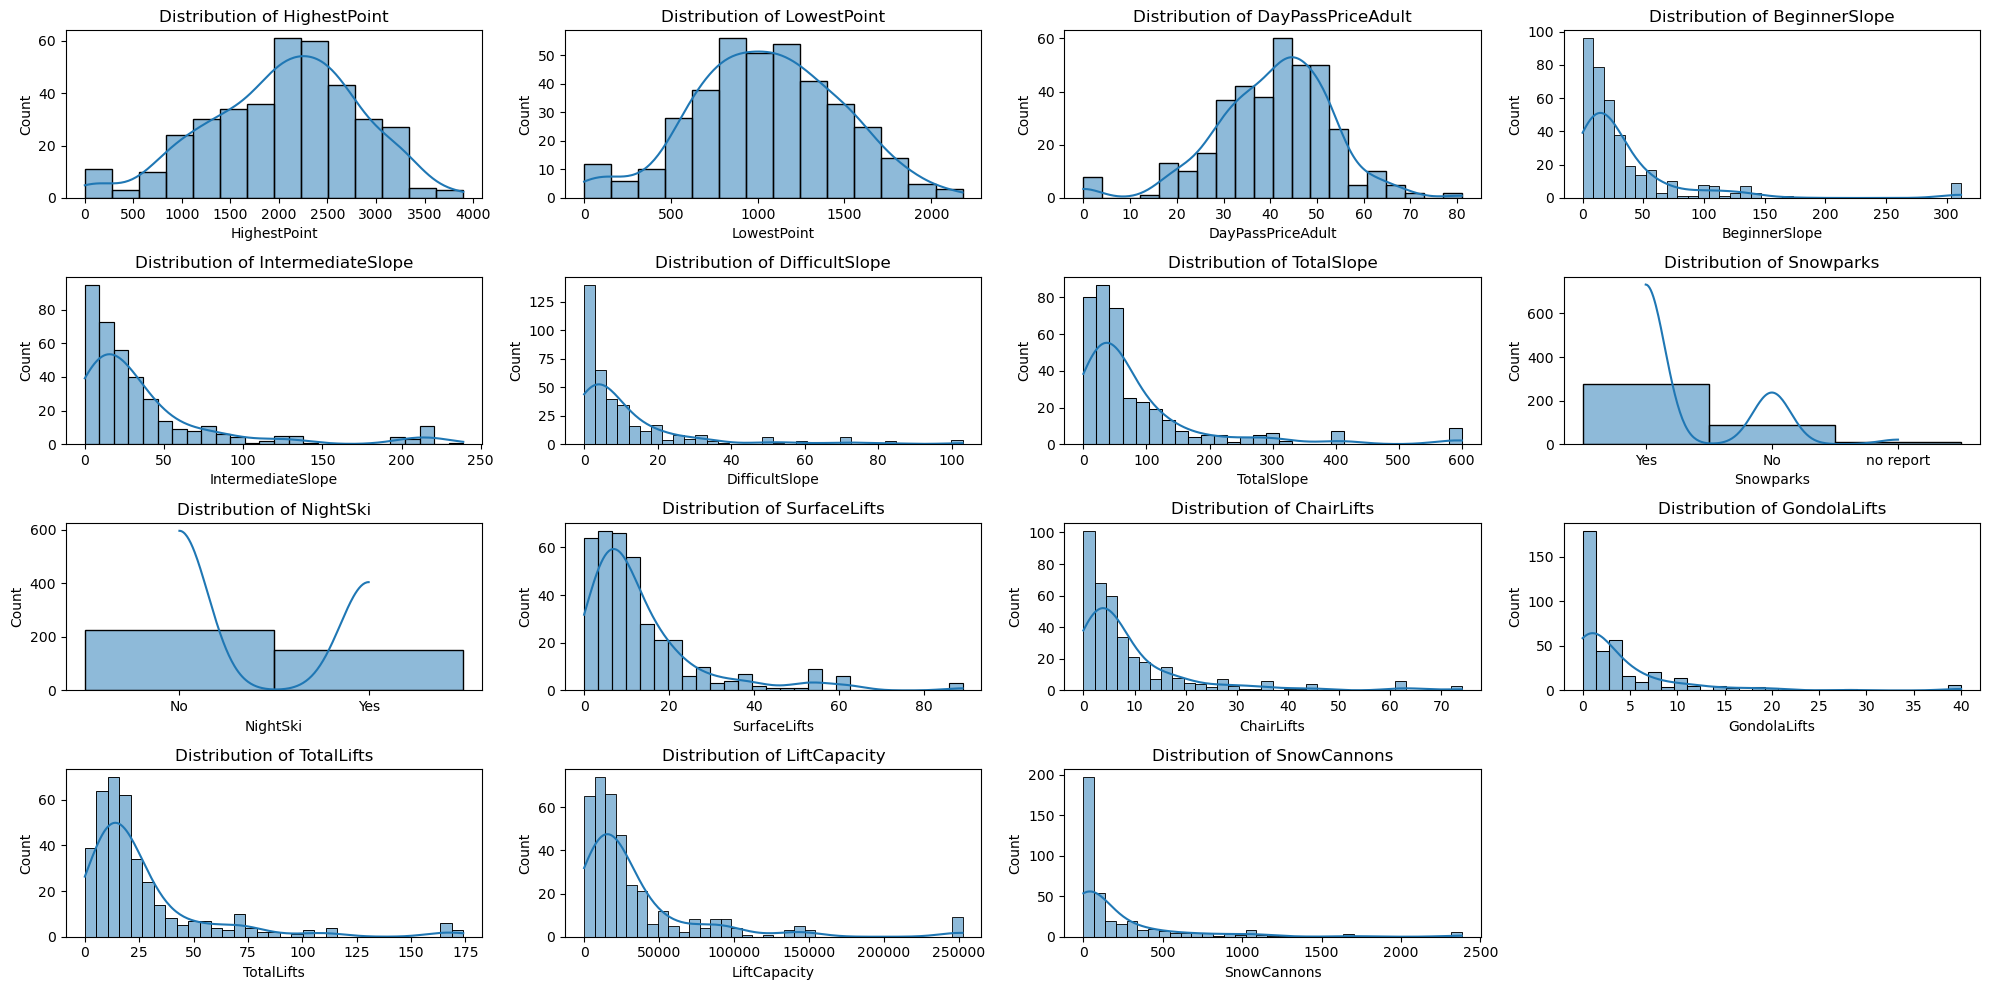

In [29]:
# Selecting a few key numerical features for distribution plots
features_to_plot = ['HighestPoint', 'LowestPoint',
       'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
       'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons']

# Creating distribution plots
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(ski_resorts_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

## There's alot of right skewed data would any transformations help (MAE,RMAE,R2) scores ?

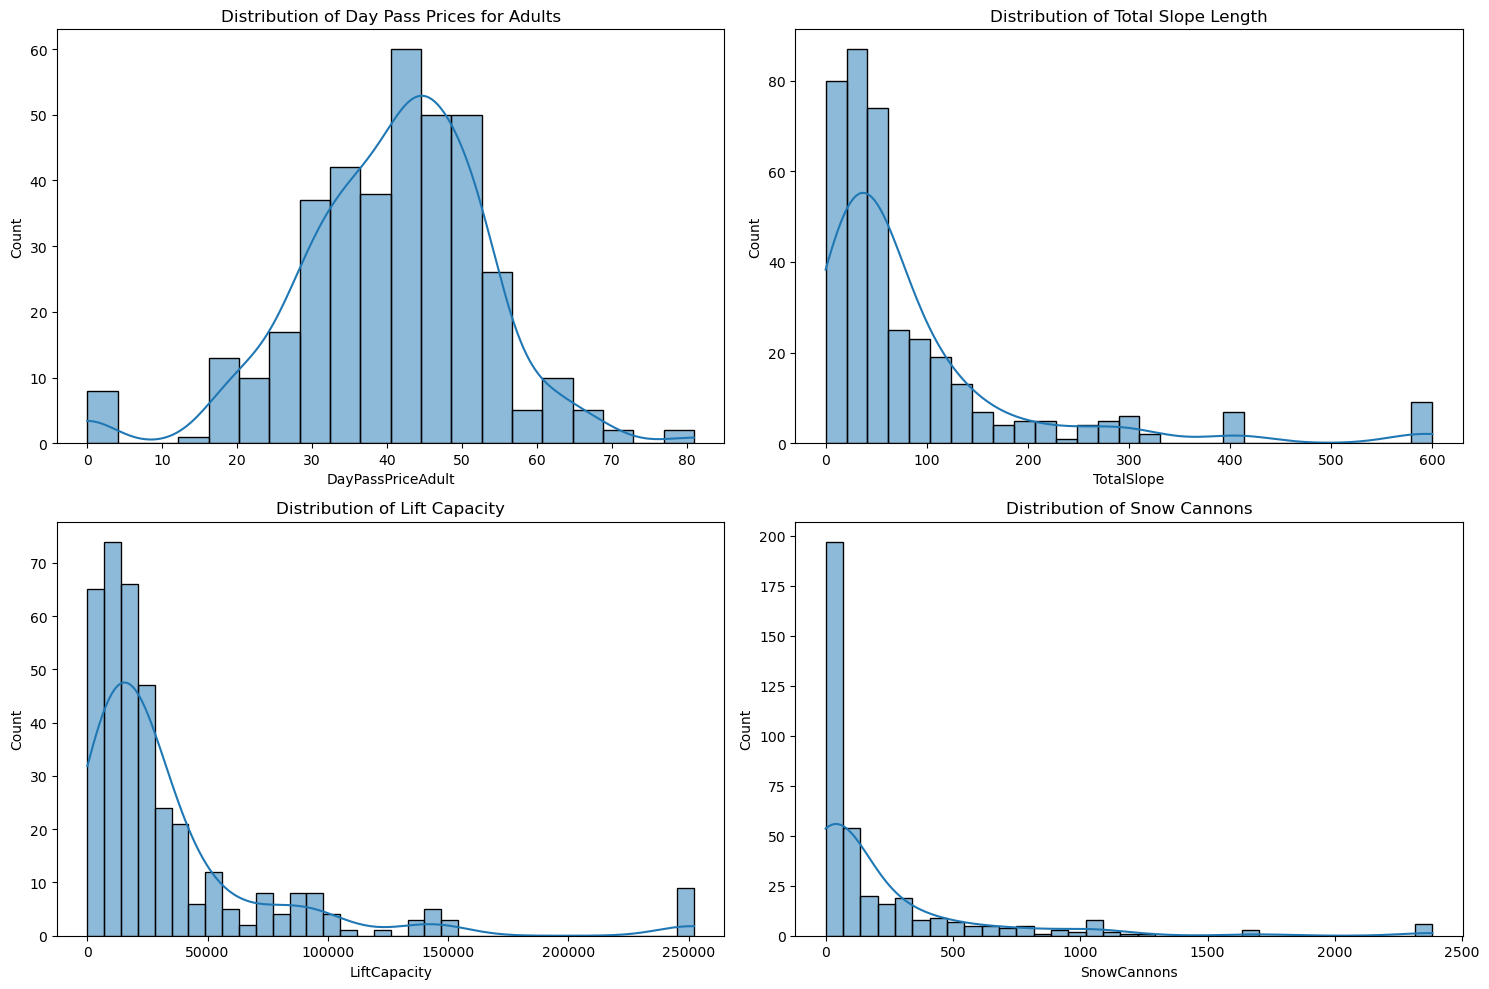

In [4]:
# Demonstrating the same visualizations with different code.
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of some of the numerical data
plt.figure(figsize=(15, 10))

# Distribution of DayPassPriceAdult
plt.subplot(2, 2, 1)
sns.histplot(ski_resorts_data['DayPassPriceAdult'], kde=True)
plt.title('Distribution of Day Pass Prices for Adults')

# Distribution of TotalSlope
plt.subplot(2, 2, 2)
sns.histplot(ski_resorts_data['TotalSlope'], kde=True)
plt.title('Distribution of Total Slope Length')

# Distribution of LiftCapacity
plt.subplot(2, 2, 3)
sns.histplot(ski_resorts_data['LiftCapacity'], kde=True)
plt.title('Distribution of Lift Capacity')

# Distribution of SnowCannons
plt.subplot(2, 2, 4)
sns.histplot(ski_resorts_data['SnowCannons'], kde=True)
plt.title('Distribution of Snow Cannons')

plt.tight_layout()
plt.show()


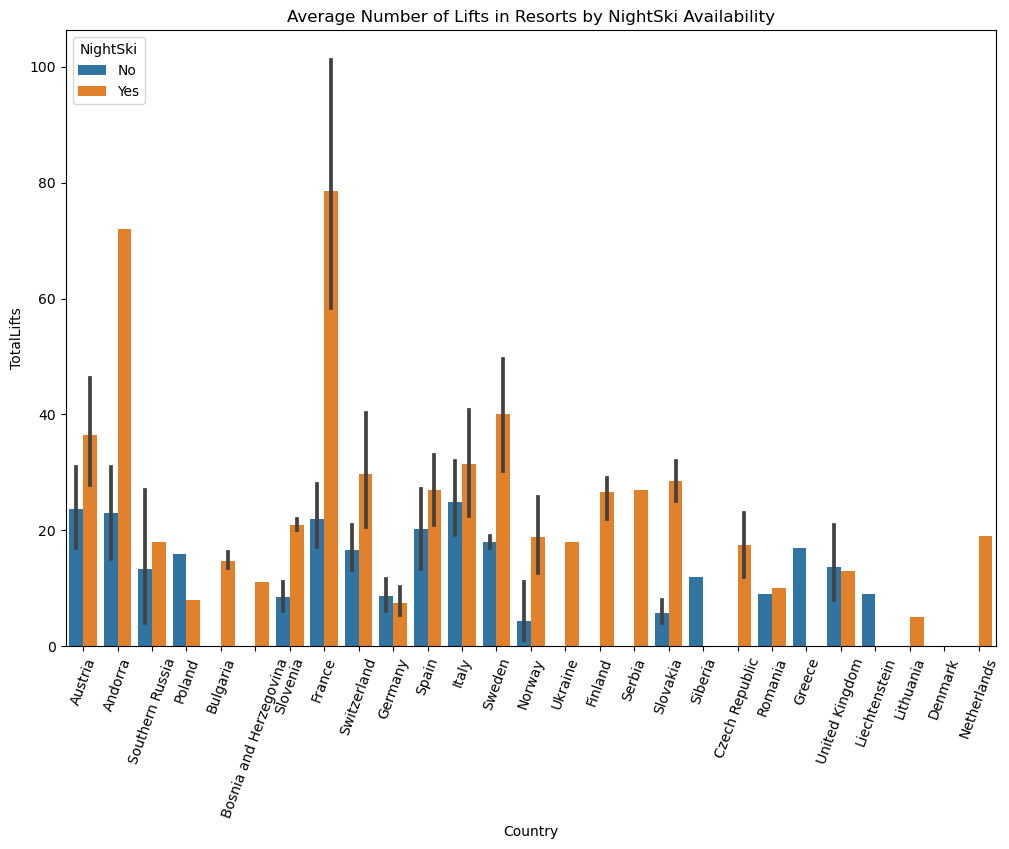

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(data=ski_resorts_data, x='Country', y='TotalLifts', hue='NightSki')
plt.xticks(rotation=70)
plt.title('Average Number of Lifts in Resorts by NightSki Availability')
plt.show()


### They are error bars. They can display either confidence intervals or the standard deviation.

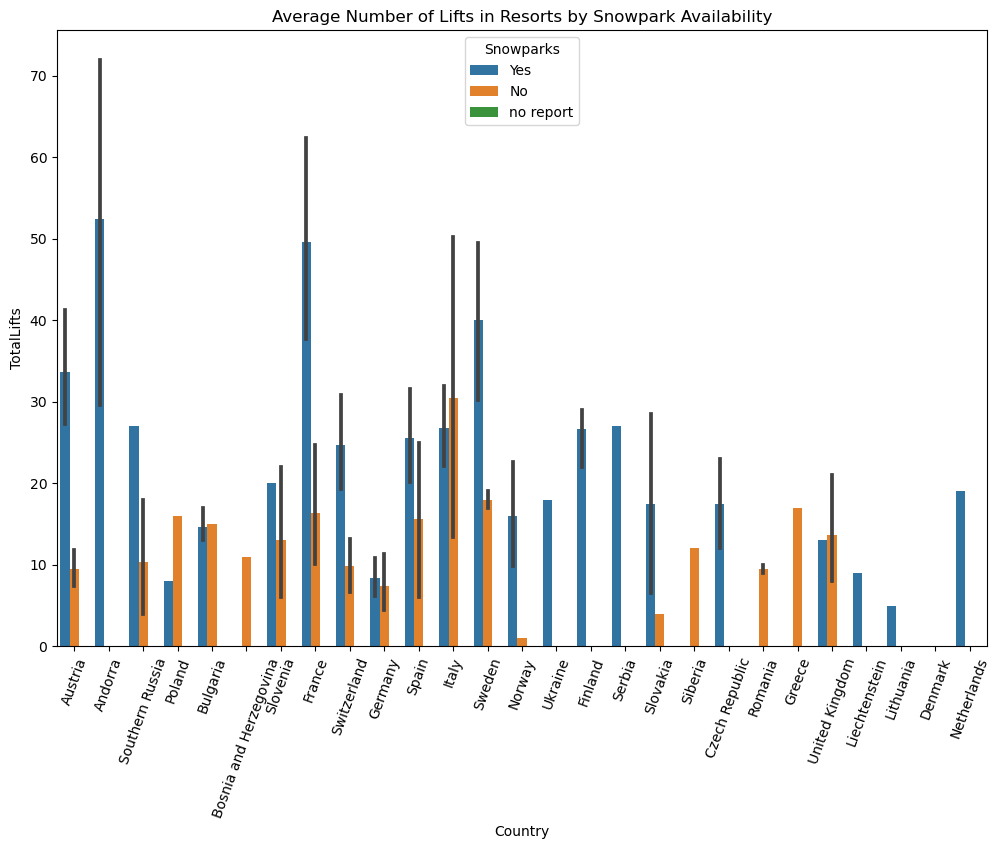

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(data=ski_resorts_data, x='Country', y='TotalLifts', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Average Number of Lifts in Resorts by Snowpark Availability')
plt.show()


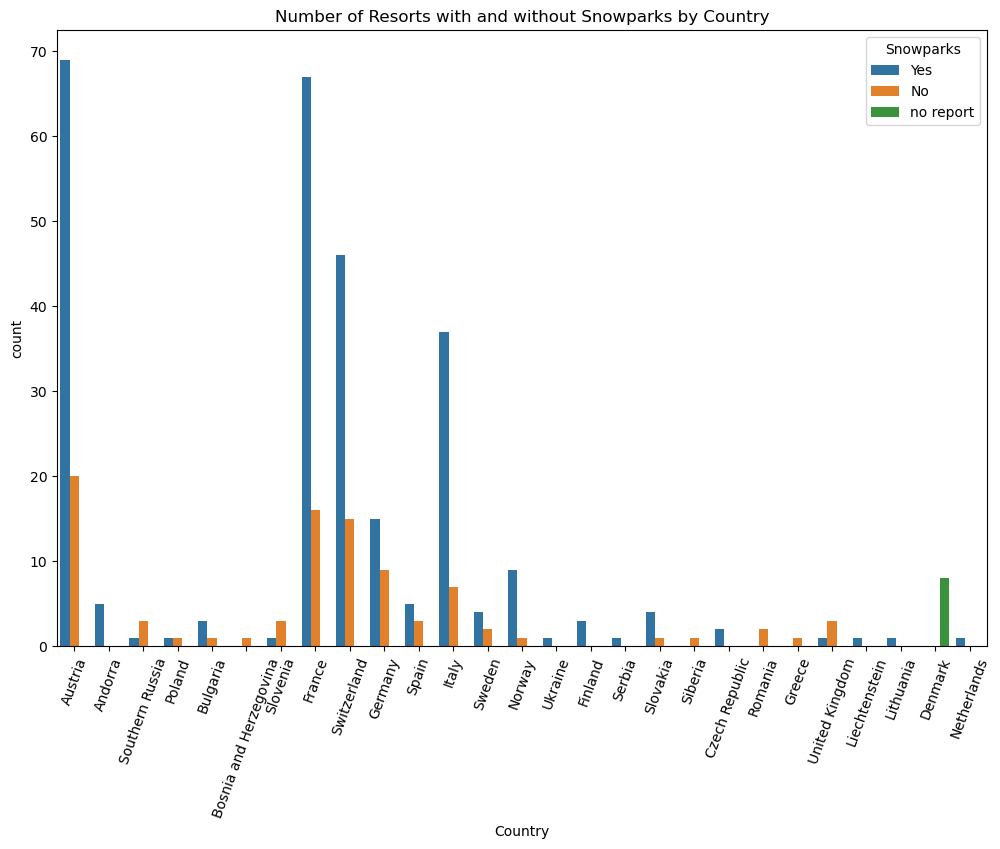

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(data=ski_resorts_data, x='Country', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Number of Resorts with and without Snowparks by Country')
plt.show()


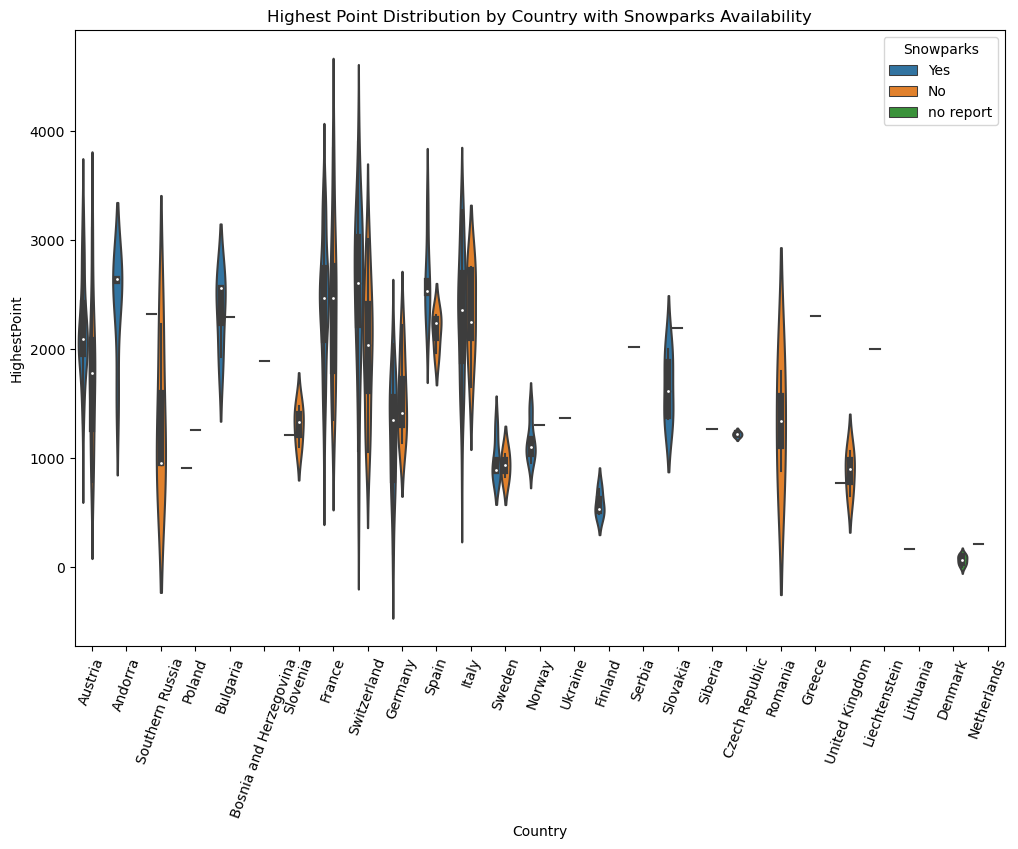

In [66]:
plt.figure(figsize=(12,8))
sns.violinplot(data=ski_resorts_data, x='Country', y='HighestPoint', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Highest Point Distribution by Country with Snowparks Availability')
plt.show()


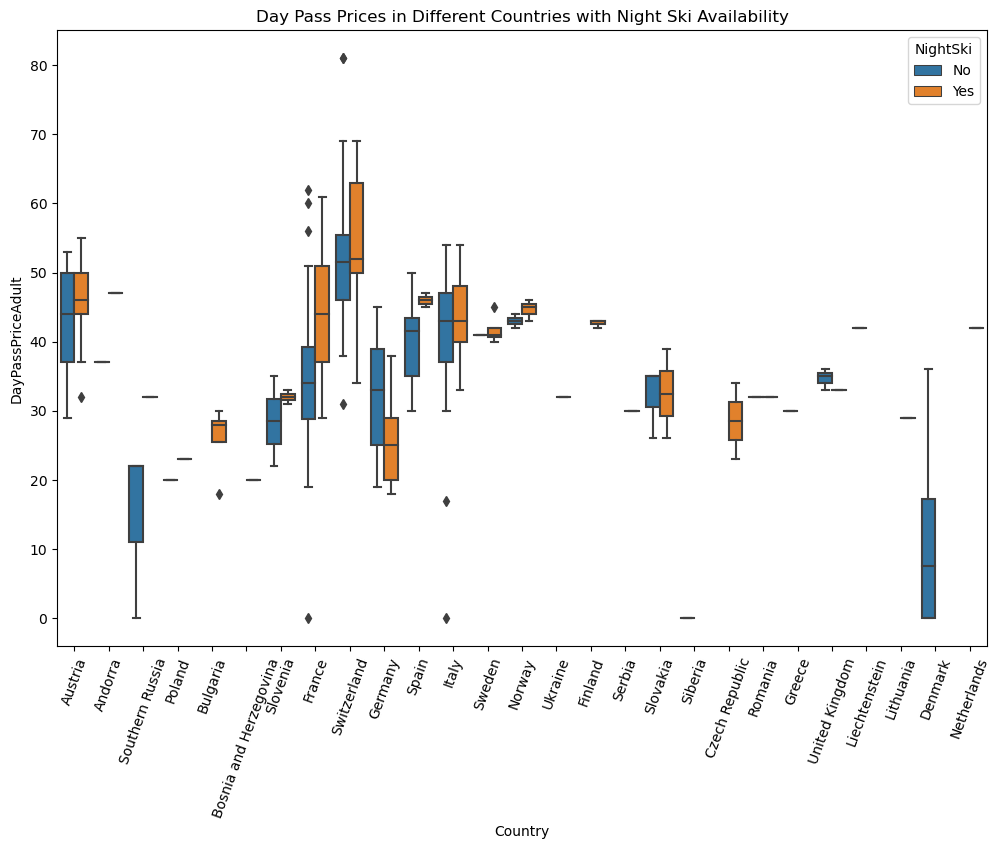

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(data=ski_resorts_data, x='Country', y='DayPassPriceAdult', hue='NightSki')
plt.xticks(rotation=70)
plt.title('Day Pass Prices in Different Countries with Night Ski Availability')
plt.show()


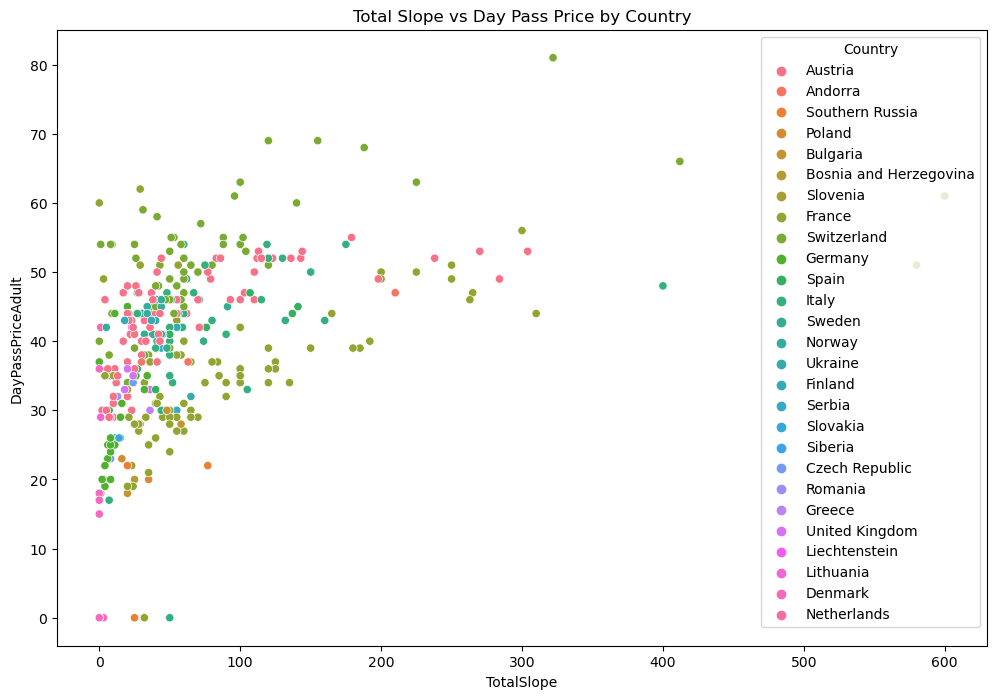

In [70]:
# Example: Relationship between 'TotalSlope' and 'DayPassPriceAdult' differentiated by 'Country'
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='TotalSlope', y='DayPassPriceAdult', hue='Country')
plt.title('Total Slope vs Day Pass Price by Country')
plt.show()


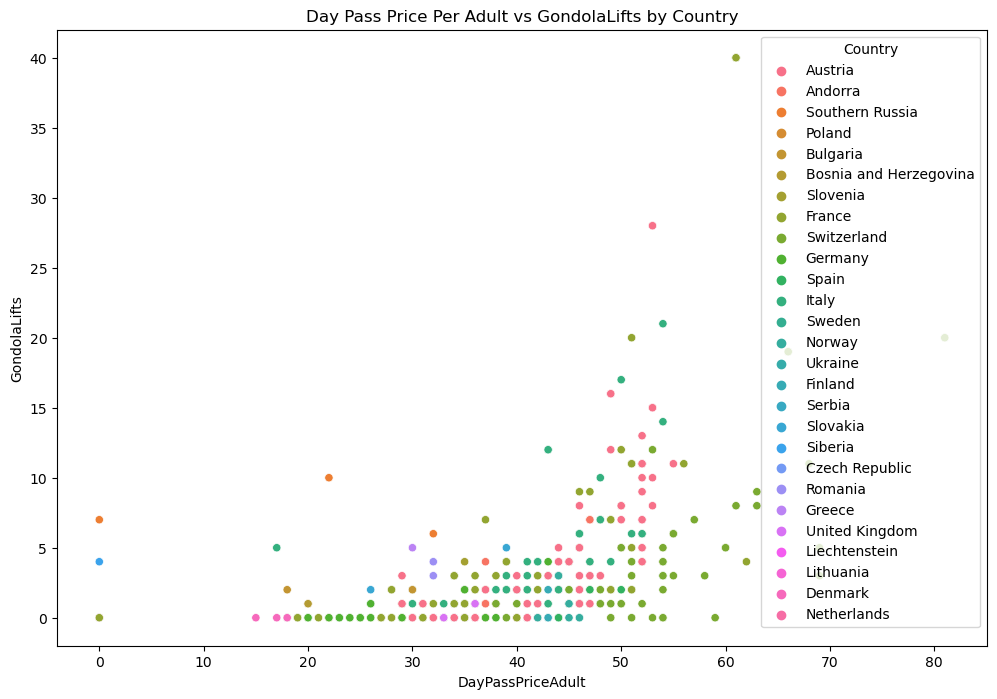

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='DayPassPriceAdult', y='GondolaLifts', hue='Country')
plt.title('Day Pass Price Per Adult vs GondolaLifts by Country')
plt.show()


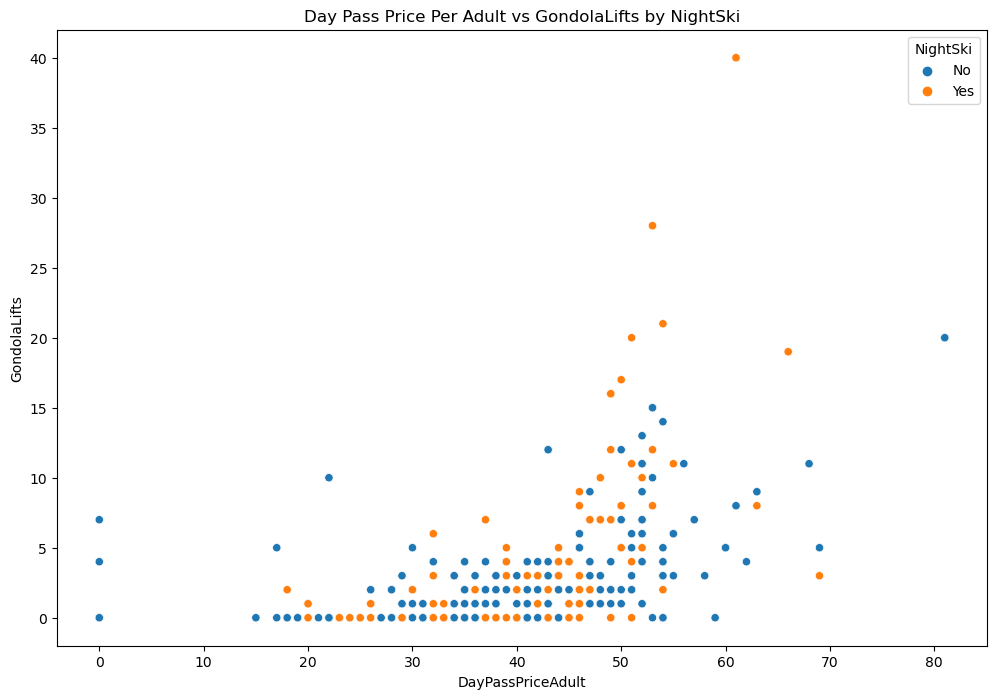

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='DayPassPriceAdult', y='GondolaLifts', hue='NightSki')
plt.title('Day Pass Price Per Adult vs GondolaLifts by NightSki')
plt.show()

# Visual Analysis
#### * Day Pass Prices: The distribution shows a concentration around €40-€50, indicating this as a common price range for adult day passes. 
#### * Total Slope Length: The distribution is right-skewed, with most resorts having total slope lengths below 100 km.
#### * Lift Capacity: This is also right-skewed, suggesting most resorts have a moderate lift capacity.
#### * Snow Cannons: Many resorts have a low to moderate number of snow cannons, with a few exceptions having significantly more.
#### * Daypass prices in certain countries have serious outliers.

/Users/madisonavemoe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


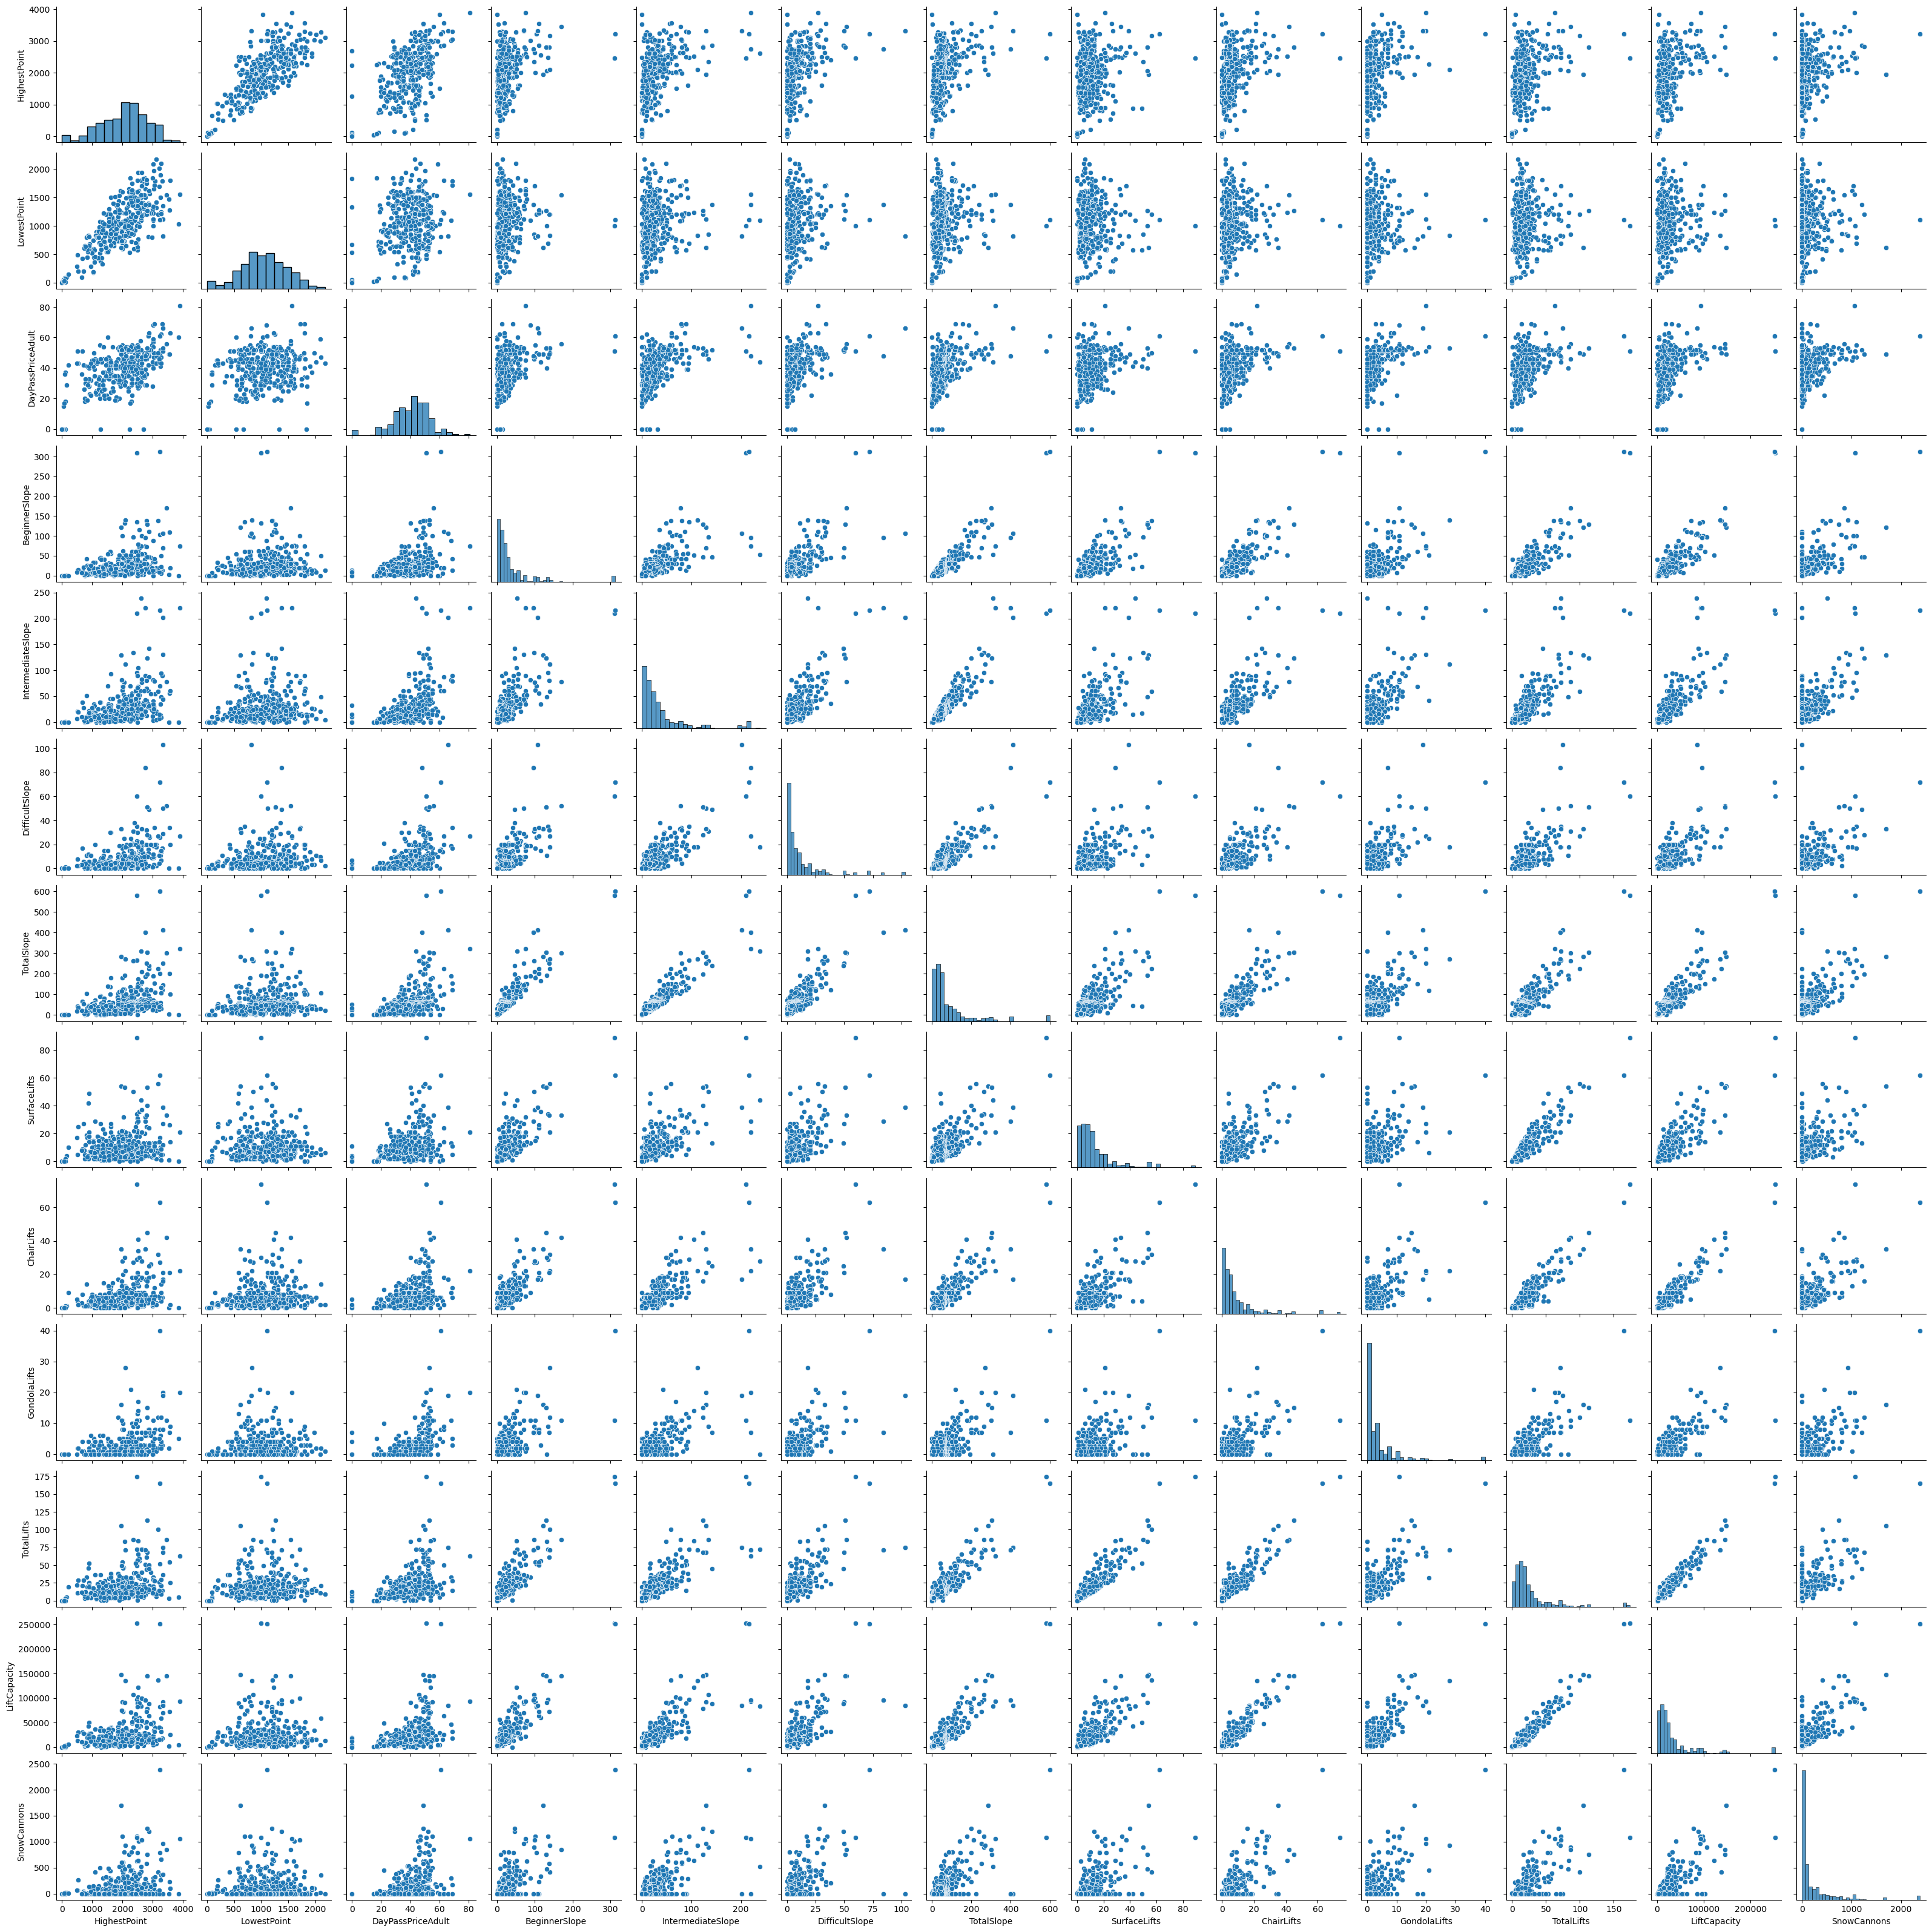

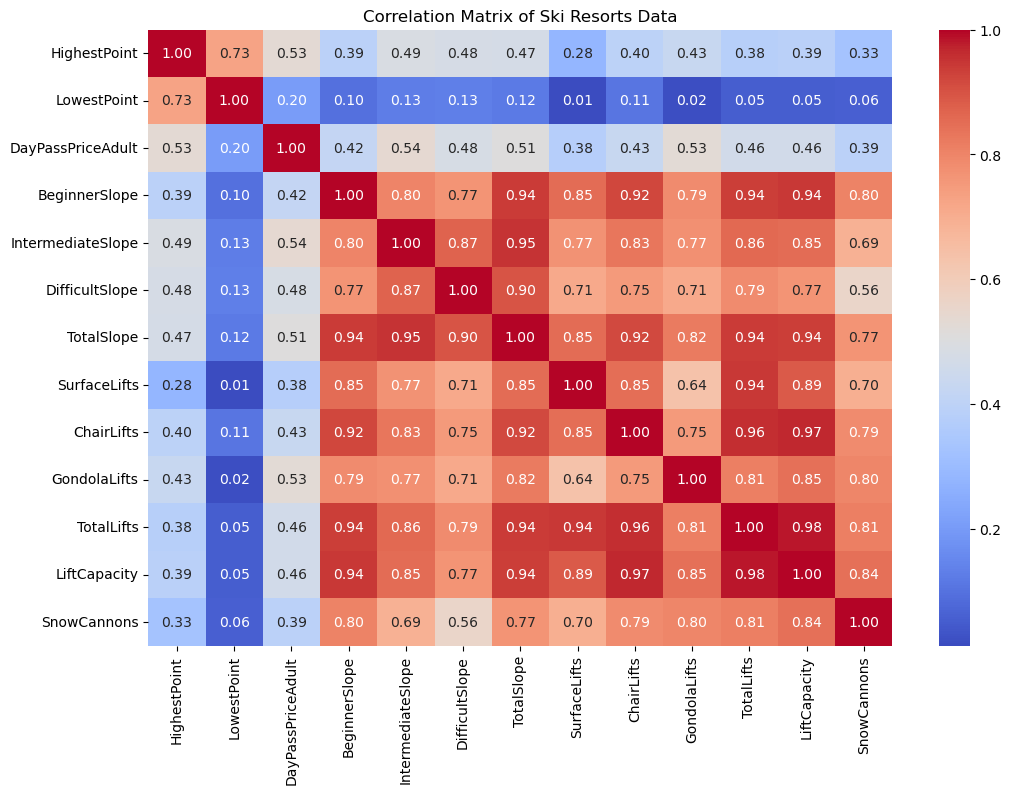

In [31]:
# Dropping the non-numerical column 'Resort' and the index column for visualization purposes
ski_resorts_numerical = ski_resorts_data.drop(['Resort', 'Unnamed: 0',], axis=1)

# Pairplot to visualize distributions and relationships
sns.pairplot(ski_resorts_numerical)
plt.show()

# Correlation matrix
corr_matrix = ski_resorts_numerical.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Ski Resorts Data")
plt.show()

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Assuming 'DayPassPriceAdult' is the target and the rest are features
#X = ski_resorts_data.drop(['DayPassPriceAdult', 'Resort', 'Unnamed: 0'], axis=1)
#y = ski_resorts_data['DayPassPriceAdult']
# Example using IQR for 'DayPassPriceAdult'
ski_resorts_data['SlopeRange'] = ski_resorts_data['HighestPoint'] - ski_resorts_data['LowestPoint']
Q1 = ski_resorts_data['DayPassPriceAdult'].quantile(0.25)
Q3 = ski_resorts_data['DayPassPriceAdult'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ski_resorts_data = ski_resorts_data[(ski_resorts_data['DayPassPriceAdult'] >= lower_bound) & 
                                    (ski_resorts_data['DayPassPriceAdult'] <= upper_bound)]
# One-hot encoding for categorical variables
ski_resorts_data_encoded = pd.get_dummies(ski_resorts_data, columns=['Country', 'Snowparks', 'NightSki'])

X = ski_resorts_data_encoded.drop(['Resort','Unnamed: 0','DayPassPriceAdult'],axis=1)
y = ski_resorts_data_encoded['DayPassPriceAdult']
feature_names = ski_resorts_data_encoded.drop(['Resort', 'Unnamed: 0'], axis=1).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression MSE: 9.850193538769368e+26


In [237]:
ski_resorts_data.shape

(366, 19)

## After filtering out the data,removing outliers and scaling the data, the model still does poorly.
## Require more thorough Research into overfitting in Linear Regression Models.

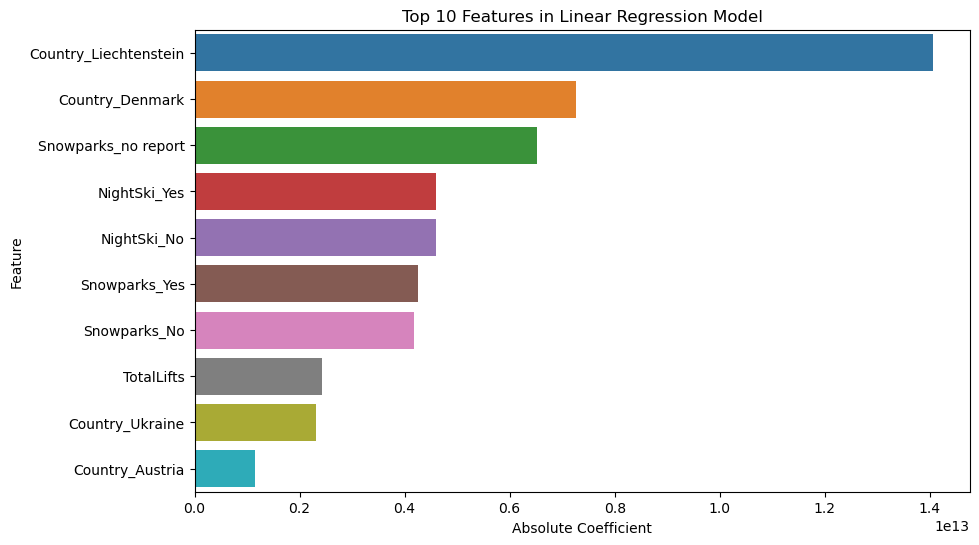

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = linear_reg.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [255]:
coef_df

Feature   Coefficient  Abs_Coefficient
24           Country_Liechtenstein -1.405195e+13     1.405195e+13
18                 Country_Denmark  7.270181e+12     7.270181e+12
41             Snowparks_no report -6.524059e+12     6.524059e+12
43                    NightSki_Yes -4.590727e+12     4.590727e+12
42                     NightSki_No -4.590727e+12     4.590727e+12
40                   Snowparks_Yes  4.246196e+12     4.246196e+12
39                    Snowparks_No  4.180734e+12     4.180734e+12
9                       TotalLifts -2.428852e+12     2.428852e+12
37                 Country_Ukraine -2.309819e+12     2.309819e+12
14                 Country_Austria -1.151528e+12     1.151528e+12
6                     SurfaceLifts  1.131454e+12     1.131454e+12
20                  Country_France -1.119195e+12     1.119195e+12
7                       ChairLifts  9.875168e+11     9.875168e+11
36             Country_Switzerland -9.870404e+11     9.870404e+11
23                   Country_Italy -8.643213e+11     8.643213e+11
21                 Country_Germany -6.644440e+11     6.644440e+11
8                     GondolaLifts  5.086112e+11     5.086112e+11
30                  Country_Serbia  4.648086e+11     4.648086e+11
27                  Country_Norway -4.375873e+11     4.375873e+11
34                   Country_Spain -3.924879e+11     3.924879e+11
35                  Country_Sweden -3.408526e+11     3.408526e+11
31                Country_Slovakia -3.115863e+11     3.115863e+11
13                 Country_Andorra -3.115863e+11     3.115863e+11
16                Country_Bulgaria -2.790770e+11     2.790770e+11
32                Country_Slovenia -2.790770e+11     2.790770e+11
38          Country_United Kingdom -2.790770e+11     2.790770e+11
33         Country_Southern Russia -2.420213e+11     2.420213e+11
19                 Country_Finland -2.420213e+11     2.420213e+11
28                  Country_Poland -1.978816e+11     1.978816e+11
17          Country_Czech Republic -1.978816e+11     1.978816e+11
29                 Country_Romania -1.978816e+11     1.978816e+11
15  Country_Bosnia and Herzegovina -1.401155e+11     1.401155e+11
22                  Country_Greece -1.401155e+11     1.401155e+11
25               Country_Lithuania -1.401155e+11     1.401155e+11
26             Country_Netherlands -1.401155e+11     1.401155e+11
0                     HighestPoint  5.838911e+09     5.838911e+09
12                      SlopeRange -4.233251e+09     4.233251e+09
1                      LowestPoint -3.219562e+09     3.219562e+09
5                       TotalSlope  4.200591e+01     4.200591e+01
2                    BeginnerSlope -2.190968e+01     2.190968e+01
3                IntermediateSlope -1.706200e+01     1.706200e+01
4                   DifficultSlope -6.711118e+00     6.711118e+00
10                    LiftCapacity  3.658123e+00     3.658123e+00
11                     SnowCannons -7.347095e-01     7.347095e-01

In [239]:
# Top 10 influential Columns
coef_df.head(10)

Feature   Coefficient  Abs_Coefficient
24  Country_Liechtenstein -1.405195e+13     1.405195e+13
18        Country_Denmark  7.270181e+12     7.270181e+12
41    Snowparks_no report -6.524059e+12     6.524059e+12
43           NightSki_Yes -4.590727e+12     4.590727e+12
42            NightSki_No -4.590727e+12     4.590727e+12
40          Snowparks_Yes  4.246196e+12     4.246196e+12
39           Snowparks_No  4.180734e+12     4.180734e+12
9              TotalLifts -2.428852e+12     2.428852e+12
37        Country_Ukraine -2.309819e+12     2.309819e+12
14        Country_Austria -1.151528e+12     1.151528e+12

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Splitting Dataset into training and testing sets
#X = ski_resorts_data.drop(['DayPassPriceAdult', 'Resort', 'Unnamed: 0','Country'], axis=1)
#y = ski_resorts_data['DayPassPriceAdult']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_RfR = RandomForestRegressor()
model_RfR.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_RfR.predict(X_test)

# Calculating MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.9483783783783792
Mean Squared Error (MSE): 28.135691891891895
Root Mean Squared Error (RMSE): 5.304308804348771


Text(0, 0.5, 'Feature')

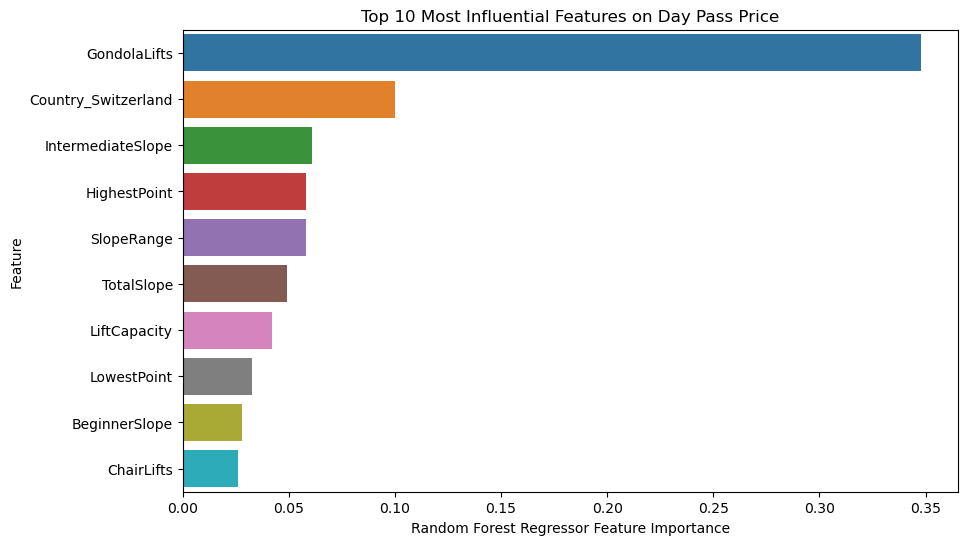

In [241]:
importances = model_RfR.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Influential Features on Day Pass Price')
plt.xlabel('Random Forest Regressor Feature Importance')
plt.ylabel('Feature')


In [242]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred))


Decision Tree Regression MSE: 71.02702702702703


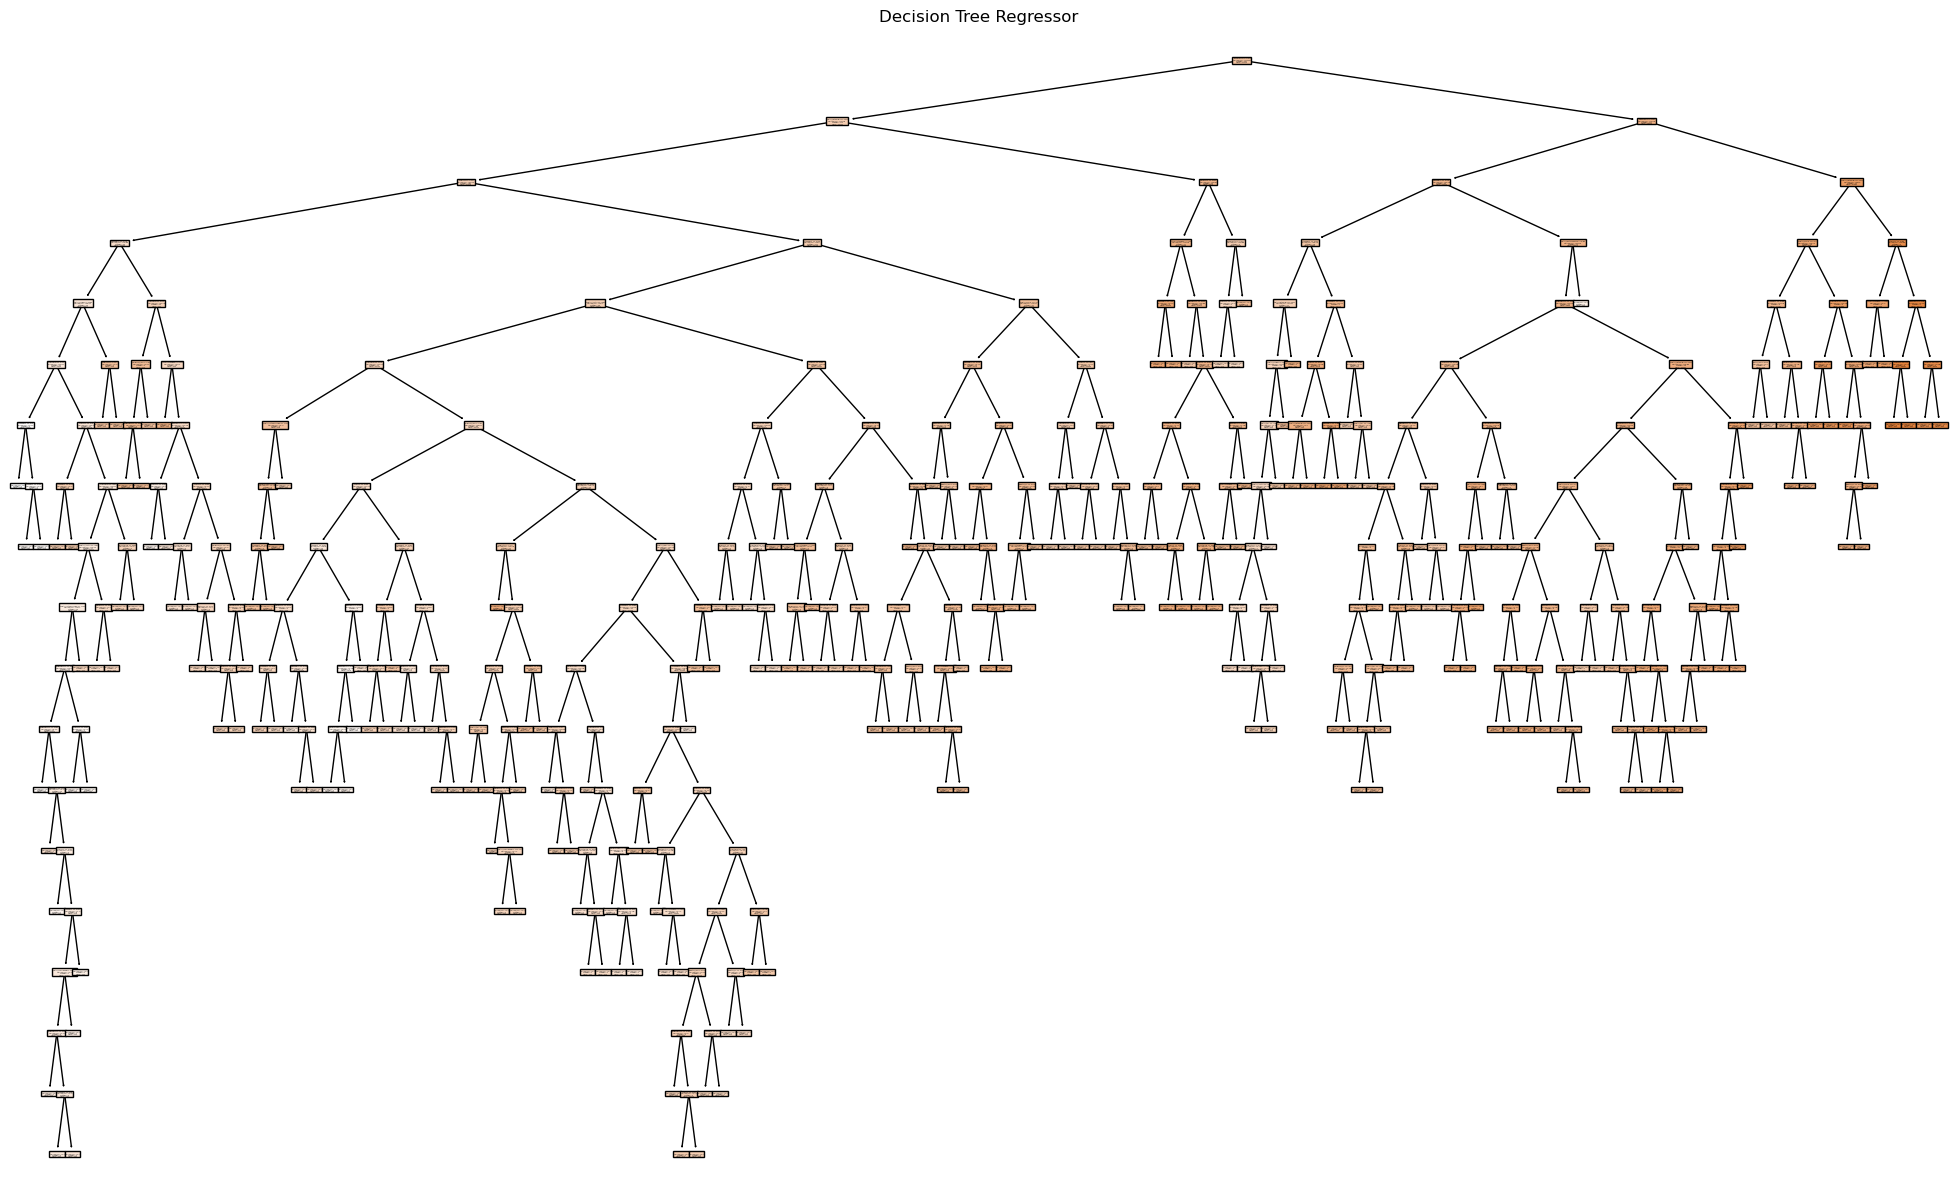

In [243]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 15))  # Set the figure size as needed
plot_tree(tree_reg, filled=True, feature_names=list(X.columns))  # 'X_encoded' should be your encoded feature matrix
plt.title("Decision Tree Regressor")
plt.show()

In [244]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)
y_pred = elastic_net_reg.predict(X_test)
print("Elastic Net Regression MSE:", mean_squared_error(y_test, y_pred))


Elastic Net Regression MSE: 30.854962299677354


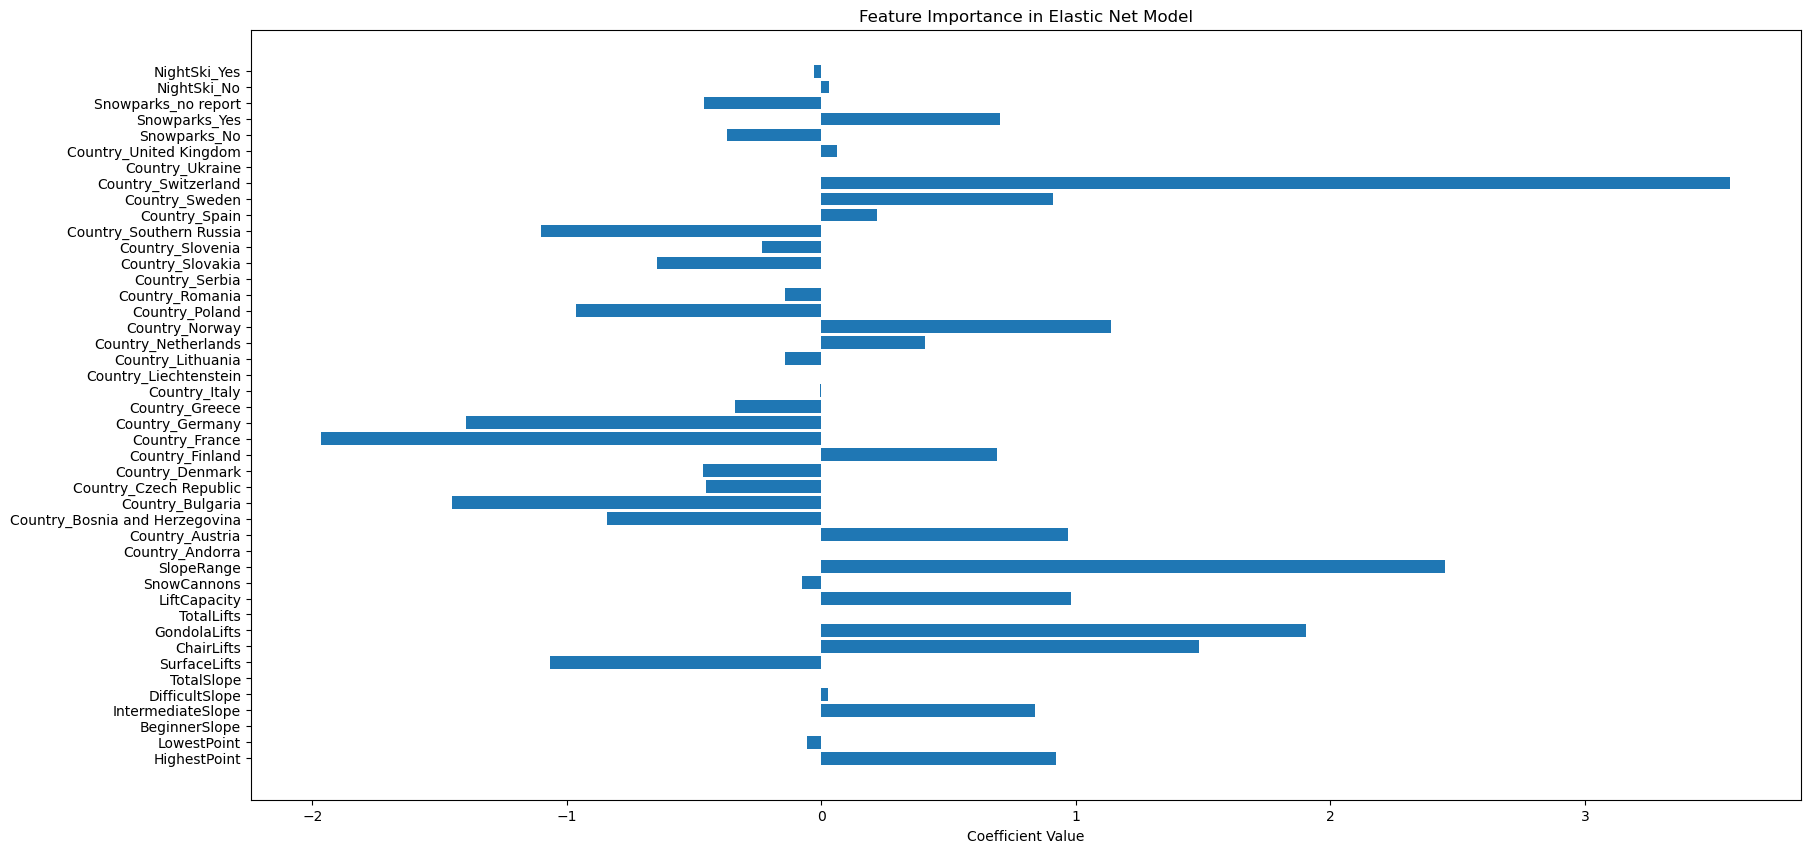

In [245]:
# Extracting coefficients
elastic_net_coef = elastic_net_reg.coef_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(elastic_net_coef)), elastic_net_coef)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Elastic Net Model')
plt.show()

In [246]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg.fit(X_train, y_train)
y_pred = gradient_boosting_reg.predict(X_test)
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred))


Gradient Boosting Regression MSE: 30.476002535148996


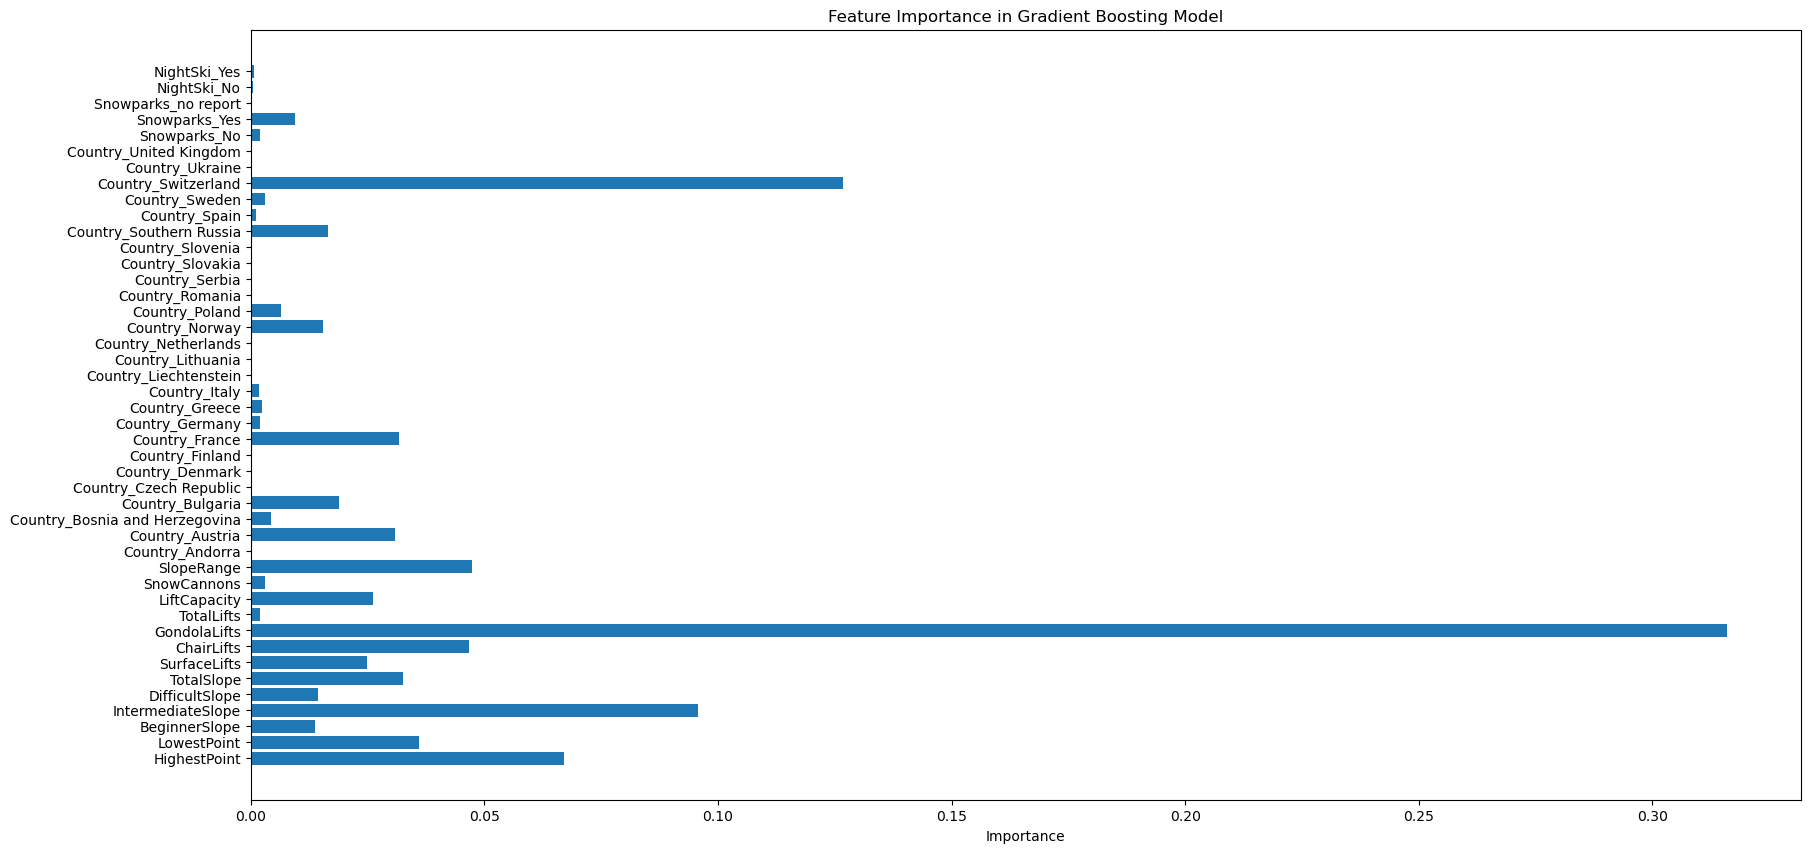

In [247]:
# Extracting feature importance
gbr_feature_importance = gradient_boosting_reg.feature_importances_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(gbr_feature_importance)), gbr_feature_importance)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

In [248]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred))


Support Vector Regression MSE: 54.11804747799877


In [249]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))


Ridge Regression MSE: 32.546684272002544


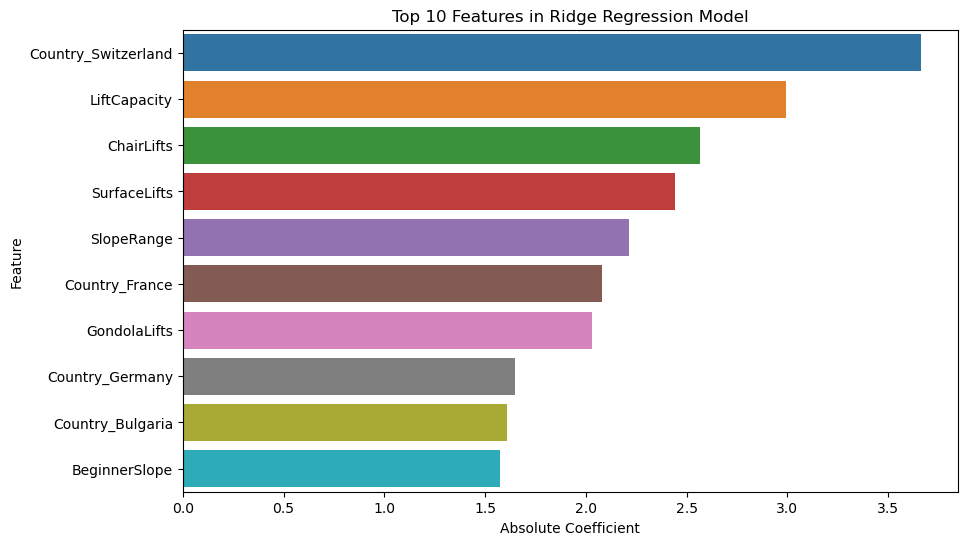

In [250]:
# Extracting coefficients
#feature_names = X.columns
ridge_coef = ridge_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coef})

# Sorting the features by the absolute value of their coefficients
ridge_coef_df['Abs_Coefficient'] = ridge_coef_df['Coefficient'].abs()
ridge_coef_df = ridge_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=ridge_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [251]:
print(len(feature_names))
print(len(ridge_coef))

44
44


In [252]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred))


Lasso Regression MSE: 31.155981719389988


LowestPoint
BeginnerSlope
DifficultSlope
TotalSlope
TotalLifts
LiftCapacity
SnowCannons
Country_Andorra
Country_Italy
Country_Liechtenstein
Country_Serbia
Country_Ukraine
Snowparks_No
NightSki_No
NightSki_Yes


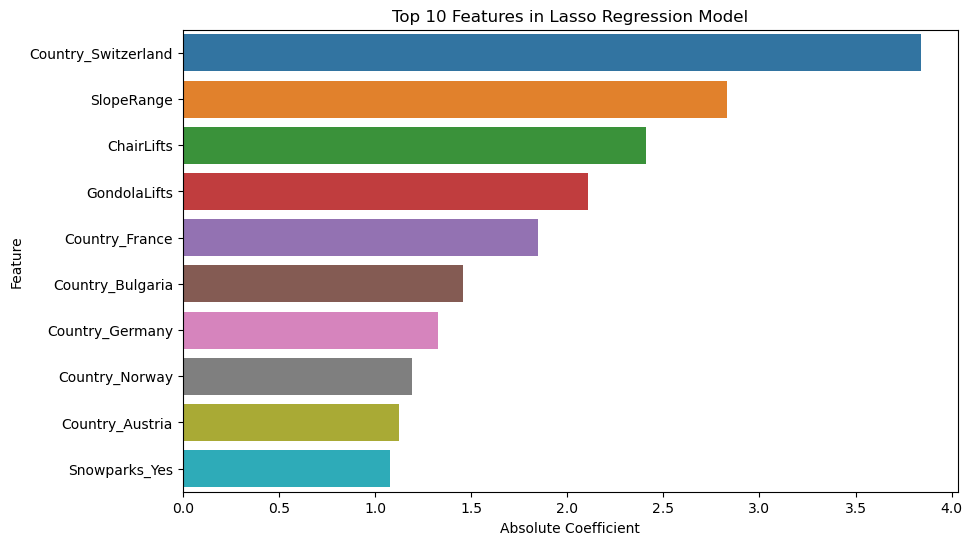

In [253]:
# Extracting coefficients
lasso_coef = lasso_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
# Check which features have a coefficient of zero
for feature, coef in zip(feature_names, lasso_coef):
    if coef == 0:
        print(feature)
    
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})

# Sorting the features by the absolute value of their coefficients
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


## The Print statement above the visualization shows what co-effecients are being reduced to 0.

In [254]:
print(len(lasso_coef))
print(len(feature_names))

44
44


### Random Forest Performed Decently but we should explore more with different models and methods.
### Lets re-run this regressor with the Data scaled and Categorical variables dealt with.